# Exploring Dandiset 000617: Allen Institute Openscope - Sequence Learning Project

**Notebook status:**  
_This notebook was automatically generated by AI. It has not yet been fully vetted or verified. Please exercise caution and review all code and results carefully before drawing conclusions or using in formal analyses._

## Dandiset Overview

- **Title:** Allen Institute Openscope - Sequence Learning Project
- **Dandiset ID:** 000617
- **Version:** 0.250312.0130
- **Link:** [View on DANDI Archive](https://dandiarchive.org/dandiset/000617/0.250312.0130)
- **Keywords:** L2/3, L4, two-photon calcium imaging, prediction, pyramidal neurons, somata, neocortex, predictive coding, predictive processing, sequence learning, movies

**Description:**  
Adaptive and coordinated behavior requires that an animal be able to make predictions about the near and even far future. This intuition that some neural computations should be ‘predictive’ in their character has driven both experiment and theory. Here, a Sequence Learning Experiment was conducted using head-fixed mice viewing repeated sequences of natural movies, leveraging two-photon microscopy to record neural activity across layers and cortical areas (see DANDI for the full description).

**Citation:**  
Berry, Michael; Lecoq, Jérôme; Amaya, Avalon; ... Caldejon, Shiella (2025) Allen Institute Openscope - Sequence Learning Project (Version 0.250312.0130) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.000617/0.250312.0130

## What this notebook covers

This notebook guides you through exploration and analysis of Dandiset 000617.  
It demonstrates how to:

- Connect to DANDI using the DANDI API
- List and inspect Dandiset assets
- Load and summarize an NWB file from the Dandiset
- Visualize various data streams (e.g., voltage, fluorescence, stimulus presentations)
- View segmentation and ROI tables
- Link out to external tools for further exploration

> The main purpose is to show HOW to access and work with the data. Visualization and commentary are primarily illustrative and should not be interpreted as analysis or results.

### Required packages

The following Python packages are required (assume they are already installed in your environment):

- dandi
- pynwb
- remfile
- h5py
- numpy
- pandas
- matplotlib
- seaborn

In [1]:
# Import needed packages (do not include installation commands)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 4]

## Connect to the DANDI Archive and Explore the Dandiset

We'll start by connecting to the DANDI Archive using the DANDI APIClient. Then, we'll print basic information about the Dandiset and list a few of the assets.

In [2]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

dandiset_id = "000617"
dandiset_version = "0.250312.0130"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print metadata
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print("")

# List a few assets in this Dandiset
assets = dandiset.get_assets()
print("First 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Sequence Learning Project
Dandiset URL: https://dandiarchive.org/dandiset/000617/0.250312.0130

First 5 assets:
- sub-684475/sub-684475_ses-1294084428-acq-1294179945-raw-movies_ophys.nwb (ID: 3eaf1acf-7a63-4286-a7c0-7a58d8cae2f8)
- sub-684475/sub-684475_ses-1294084428-acq-1294179943-raw-movies_ophys.nwb (ID: 4cfa15bb-eac7-4273-9141-6d0cc2034506)
- sub-684475/sub-684475_ses-1293785946-acq-1293914859-raw-movies_ophys.nwb (ID: d0b9a557-2c98-4fbc-af96-2318e6e5f2eb)
- sub-684475/sub-684475_ses-1294084428-acq-1294179942-raw-movies_ophys.nwb (ID: 6b8f9ba6-2481-4c7b-b78c-38c2b878d246)
- sub-684475/sub-684475_ses-1294259213-acq-1294370666-raw-movies_ophys.nwb (ID: c407d5e4-9431-4f94-b5d0-2b28069fa244)


## Choosing an NWB File to Explore

For illustration, we'll focus on a single NWB file from the Dandiset:

```
sub-677038/sub-677038_ses-1280089433-acq-1280384858_ophys.nwb
```

- **Asset ID:** 27dd7936-b3e7-45af-aca0-dc98b5954d19
- **URL:** https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/

> We now show how to load this NWB file using PyNWB and remfile, following recommended best practices for remote access.

### Load the NWB file and show basic metadata

We'll use `remfile.File` and `h5py.File` to stream the NWB directly from the archive.
(The cell below may take some seconds depending on the file size and your connection.)

**Note**: We won't display the raw nwb object as output to avoid excessive output.

In [3]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Session identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("File create date:", nwb.file_create_date)
print("Institution:", getattr(nwb, 'institution', None))
print("Subject ID:", getattr(nwb.subject, 'subject_id', None))
print("Subject age:", getattr(nwb.subject, 'age', None))
print("Subject sex:", getattr(nwb.subject, 'sex', None))

Session description: Ophys Session
Session identifier: 1280384858
Session start time: 2023-06-30 16:04:51.055000+00:00
File create date: [datetime.datetime(2025, 2, 18, 10, 31, 0, 305861, tzinfo=tzutc())]
Institution: Allen Institute for Brain Science
Subject ID: 677038
Subject age: P92.0D
Subject sex: F


## Summary of NWB File Structure

- **Acquisition**
  - `v_in`, `v_sig` (TimeSeries): Running wheel encoder signals
- **Stimulus template**
  - `gray`, `movie_clip_A`, `movie_clip_B`, `movie_clip_C` (ImageSeries): Images/movies used as stimuli
- **Processing**
  - Modules: `ophys`, `running`, `stimulus`, `stimulus_ophys`
  - `ophys` contains:  
    - `corrected_fluorescence`, `dff`, `event_detection`, `image_segmentation`, `images`, `neuropil_trace`
- **Intervals**
  - Event tables for stimulus epochs (e.g., `gray_presentations`, `movie_clip_A_presentations`)
- **Devices, Imaging planes**

An overview table for selected data interfaces:

| Key | Description | Shape / Info |
|-----|-------------|--------------|
| acquisition['v_in'].data | Running wheel max voltage | (252,000,) float64 |
| acquisition['v_sig'].data | Running wheel voltage signal | (252,000,) float64 |
| processing['ophys'].data_interfaces['corrected_fluorescence'].roi_response_series['traces'].data | corrected fluorescence traces | (40,019, 121) float64 |
| processing['ophys'].data_interfaces['dff'].roi_response_series['traces'].data | normalized dF/F traces | (40,019, 121) float64 |
| processing['ophys'].data_interfaces['event_detection'].data | detected events | (40,019, 121) float64 |
| processing['ophys'].data_interfaces['image_segmentation'].plane_segmentations['cell_specimen_table'] | ROI segmentation table | 121 ROIs, 12 columns |
| stimulus_template['movie_clip_A'].data | Movie A images | (1280, 720, 120) uint8 |

**You can also inspect this NWB file interactively on [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&dandisetId=000617&dandisetVersion=draft) for richer visual exploration.**

## Load and Visualize Example Data

Let's start by visualizing a segment of the running wheel data and one of the stimulus movies.

We'll load only a subset of data for plotting, for efficiency.

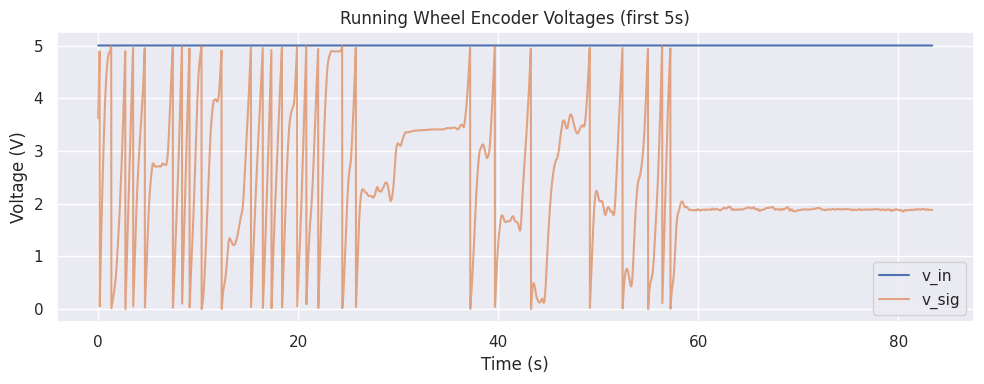

In [4]:
# Plot a subset of running wheel voltage for the first 5 seconds
v_in = nwb.acquisition['v_in']
v_sig = nwb.acquisition['v_sig']

num_pts = 5000  # ~ first 5 seconds if sampled at ~1 kHz
timestamps = v_in.timestamps[:num_pts]
vin_data = v_in.data[:num_pts]
vsig_data = v_sig.data[:num_pts]

plt.figure()
plt.plot(timestamps, vin_data, label='v_in')
plt.plot(timestamps, vsig_data, label='v_sig', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Running Wheel Encoder Voltages (first 5s)')
plt.legend()
plt.tight_layout()
plt.show()

### Show some stimulus frames

Let's visualize the first movie frame from each of the three stimulus movies (A, B, C).

Only the first frames are loaded to avoid excessive data transfer.

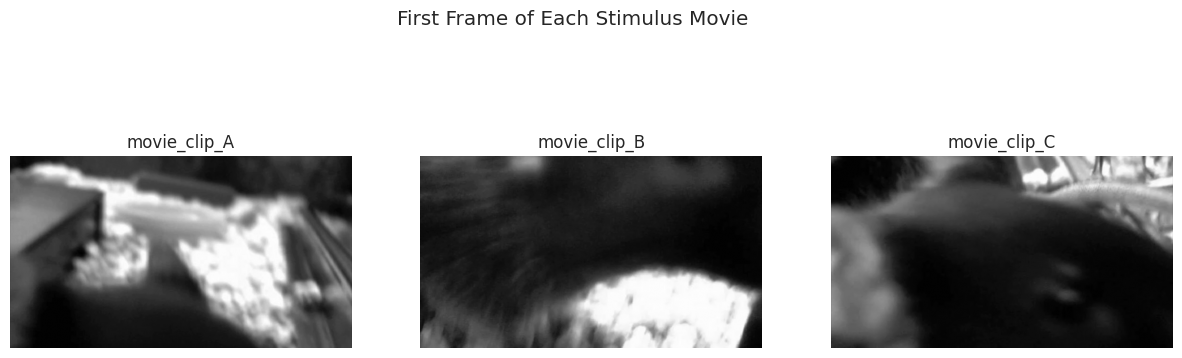

In [5]:
stim_template = nwb.stimulus_template
frames = {}
for movie_name in ['movie_clip_A', 'movie_clip_B', 'movie_clip_C']:
    series = stim_template[movie_name]
    # First frame: series.data[:,:,0]
    frames[movie_name] = series.data[:, :, 0]  # shape: (1280, 720)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (name, img) in enumerate(frames.items()):
    axs[i].imshow(img.T, cmap='gray')
    axs[i].set_title(name)
    axs[i].axis('off')
plt.suptitle('First Frame of Each Stimulus Movie')
plt.show()

## Explore Calcium Imaging Data

The file contains segmentation of 121 ROIs (putative cells). Let's view information about these ROIs and plot traces for a small subset.

We'll load the segmentation table as a DataFrame (first five rows) and plot dF/F for five example ROIs.

,cell_specimen_id,height,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y,image_mask
id,,,,,,,,,,,,
1285902696,-1,22,1,4.0,18.0,5.0,23.0,True,23,47,47,"[[False, False, False, False, False, False, Fa..."
1285902717,-1,18,1,4.0,18.0,5.0,23.0,True,18,282,32,"[[False, False, False, False, False, False, Fa..."
1285902742,-1,19,1,4.0,18.0,5.0,23.0,True,21,420,35,"[[False, False, False, False, False, False, Fa..."
1285902805,-1,22,0,4.0,18.0,5.0,23.0,True,23,348,196,"[[False, False, False, False, False, False, Fa..."
1285902819,-1,20,0,4.0,18.0,5.0,23.0,True,19,447,197,"[[False, False, False, False, False, False, Fa..."


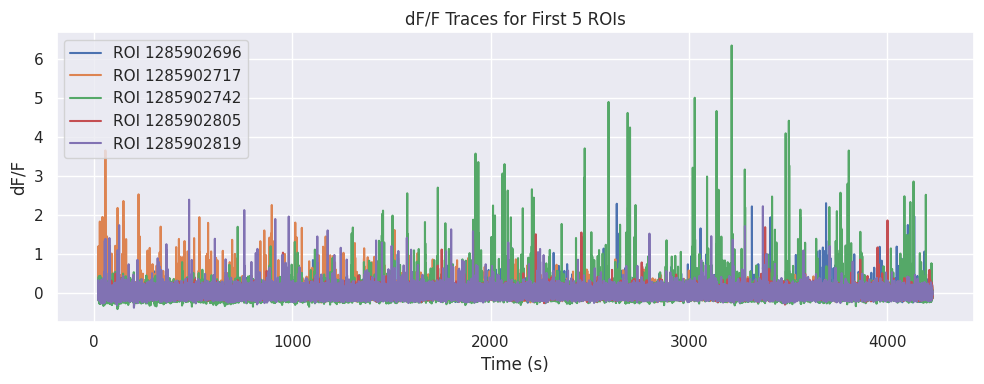

In [6]:
# Access segmentation plane and DataFrame
ophys_proc = nwb.processing['ophys']
seg_table = ophys_proc.data_interfaces['image_segmentation'].plane_segmentations['cell_specimen_table']
roi_table = seg_table.to_dataframe()
display(roi_table.head())

# Save some example cell IDs
example_rois = roi_table.index.values[:5]

# dF/F traces: shape (n_timepoints, n_rois)
dff_traces = ophys_proc.data_interfaces['dff'].roi_response_series['traces']
traces_data = dff_traces.data[:, :5]  # Only first 5 ROIs
times = dff_traces.timestamps[:]

plt.figure()
for i in range(traces_data.shape[1]):
    plt.plot(times, traces_data[:, i], label=f'ROI {roi_table.index[i]}')
plt.xlabel('Time (s)')
plt.ylabel('dF/F')
plt.title('dF/F Traces for First 5 ROIs')
plt.legend()
plt.tight_layout()
plt.show()

### Visualizing segmentation masks for all ROIs

Let's display a heatmap showing where all ROI masks overlap in the field of view.

> Because masks are 2D and values are between 0 and 1, summing the maximum across all ROIs shows regions of most overlap.

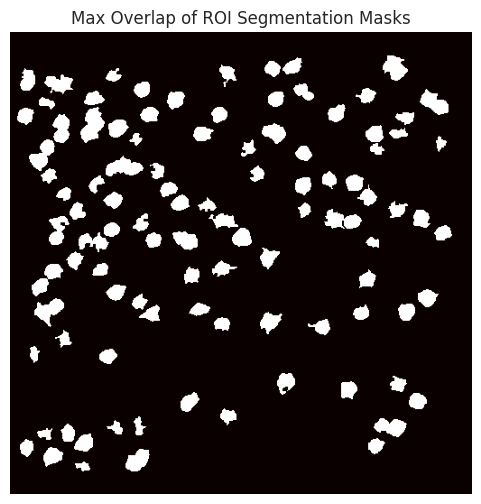

In [7]:
masks = seg_table.image_mask[:]  # shape: (n_rois, height, width)
overlap = np.max(masks, axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(overlap, cmap='hot')
plt.title('Max Overlap of ROI Segmentation Masks')
plt.axis('off')
plt.show()

## Look at Stimulus Presentations Table

We can access intervals for each stimulus and see when and how often each stimulus was presented.

For illustration, let's look at the first five presentation times for `movie_clip_A`.

In [8]:
presentations = nwb.intervals['movie_clip_A_presentations'].to_dataframe()
display(presentations[['start_time', 'stop_time', 'stimulus_name']].head())

,start_time,stop_time,stimulus_name
id,,,
0,22.908110,22.924791,movie_clip_A
1,22.924791,22.941472,movie_clip_A
2,22.941472,22.958153,movie_clip_A
3,22.958153,22.974834,movie_clip_A
4,22.974834,22.991515,movie_clip_A


## Further Analyses and Next Steps

This notebook has shown how to:

- Connect to and explore a DANDI NWB dataset
- Summarize and access acquisition, stimulus, segmentation, and ROI data
- Display selected traces, images, masks, and tables

**Potential next steps for deeper analysis might include:**
- Correlating calcium activity with stimulus blocks or running speed
- Investigating differences across ROIs, or exploring particular stimulus sequences/trials
- Clustering or sorting activity across the population during movies
- Adapting code to batch process other NWB files from this Dandiset

_For more info, see the [DANDI dataset page](https://dandiarchive.org/dandiset/000617/0.250312.0130) and [Neurosift visualization](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/27dd7936-b3e7-45af-aca0-dc98b5954d19/download/&dandisetId=000617&dandisetVersion=draft)._